In [1]:
!pip install numpy pandas matplotlib requests tqdm opencv-python pillow -i https://pypi.tuna.tsinghua.edu.cn/simple

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple


In [2]:
!pip3 install torch torchvision torchaudio --extra-index-url https://download.pytorch.org/whl/cu113

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple, https://download.pytorch.org/whl/cu113


In [ ]:
!pip install mmcv-full -f https://download.openmmlab.com/mmcv/dist/cu113/torch1.10.0/index.html

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
Looking in links: https://download.openmmlab.com/mmcv/dist/cu113/torch1.10.0/index.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 607.9/607.9 kB 134.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 254.7/254.7 kB 110.3 MB/s eta 0:00:00

In [3]:
import torch
import torchvision
import torch.nn.functional as F

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

In [4]:
device

device(type='cuda', index=0)

In [5]:
idx_to_labels = np.load('idx_to_labels.npy', allow_pickle=True).item()

In [6]:
idx_to_labels

{0: 'alligator apple',
 1: 'apple',
 2: 'avocado',
 3: 'banana',
 4: 'barberry',
 5: 'bayberry',
 6: 'bell pepper',
 7: 'black berry',
 8: 'black cherry',
 9: 'blueberry',
 10: 'bottle gourd',
 11: 'cantaloupe',
 12: 'carambola',
 13: 'cherry',
 14: 'coconut',
 15: 'corn kernel',
 16: 'custard apple',
 17: 'dragonfruit',
 18: 'durian',
 19: 'eggplant',
 20: 'fig',
 21: 'grape',
 22: 'jackfruit',
 23: 'jalapeno',
 24: 'kiwi',
 25: 'lemon',
 26: 'lime',
 27: 'longan',
 28: 'macadamia',
 29: 'mango',
 30: 'orange',
 31: 'papaya',
 32: 'pea',
 33: 'peanut',
 34: 'pear',
 35: 'persimmon',
 36: 'pineapple',
 37: 'pomegranate',
 38: 'pumpkin',
 39: 'saguaro',
 40: 'strawberry',
 41: 'tomato',
 42: 'watermelon',
 43: 'zucchini'}

In [26]:
model = torch.load('checkpoint/best-0.934.pth')
model = model.eval().to(device)

In [27]:
from PIL import Image

In [97]:
# img_path = 'Fruit-Project_split/test/kiwi/321.jpg'
img_path = 'Fruit-Project_split/test/avocado/1098.jpg'

In [98]:
img_pil = Image.open(img_path)

In [99]:
np.array(img_pil).shape

(162, 243, 3)

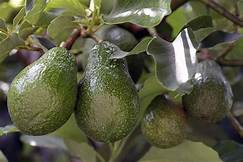

In [100]:
img_pil

In [101]:
from torchvision import transforms
test_transform = transforms.Compose([transforms.Resize(256),
                                     transforms.CenterCrop(224),
                                     transforms.ToTensor(),
                                     transforms.Normalize(
                                         mean=[0.485, 0.456, 0.406], 
                                         std=[0.229, 0.224, 0.225])
                                    ])

In [102]:
input_img = test_transform(img_pil) 

In [103]:
input_img.shape

torch.Size([3, 224, 224])

In [104]:
input_img = input_img.unsqueeze(0).to(device)

In [105]:
input_img.shape

torch.Size([1, 3, 224, 224])

In [106]:
pred_logits = model(input_img) 
pred_logits

tensor([[ 2.0040, -0.4684, 16.4121, -1.6598, -3.2714, -1.9883, -1.2833, -3.6386,
         -1.6263, -1.7092, -0.2275, -0.9727, -1.3809, -2.4563, -4.0309, -5.8841,
          0.6226, -3.2367, -0.5625, -0.1629,  1.2612, -3.5630,  1.8785,  0.7092,
          0.7576,  1.7709,  2.5457, -3.6945,  2.6735, -1.3027, -2.9391,  0.8541,
         -0.5188, -2.8893,  7.1805, -3.3156, -3.3794, -4.3734, -5.0345, -1.2121,
         -0.8766, -5.6716, -1.3977,  0.7109]], device='cuda:0',
       grad_fn=<AddmmBackward0>)

In [107]:
pred_softmax = F.softmax(pred_logits, dim=1)
pred_softmax 

tensor([[5.5280e-07, 4.6647e-08, 9.9990e-01, 1.4171e-08, 2.8282e-09, 1.0203e-08,
         2.0649e-08, 1.9591e-09, 1.4655e-08, 1.3488e-08, 5.9357e-08, 2.8173e-08,
         1.8729e-08, 6.3899e-09, 1.3232e-09, 2.0741e-10, 1.3888e-07, 2.9280e-09,
         4.2459e-08, 6.3317e-08, 2.6302e-07, 2.1128e-09, 4.8761e-07, 1.5145e-07,
         1.5895e-07, 4.3786e-07, 9.5024e-07, 1.8524e-09, 1.0798e-06, 2.0253e-08,
         3.9431e-09, 1.7506e-07, 4.4354e-08, 4.1444e-09, 9.7881e-05, 2.7059e-09,
         2.5385e-09, 9.3950e-10, 4.8508e-10, 2.2173e-08, 3.1013e-08, 2.5651e-10,
         1.8418e-08, 1.5171e-07]], device='cuda:0', grad_fn=<SoftmaxBackward0>)

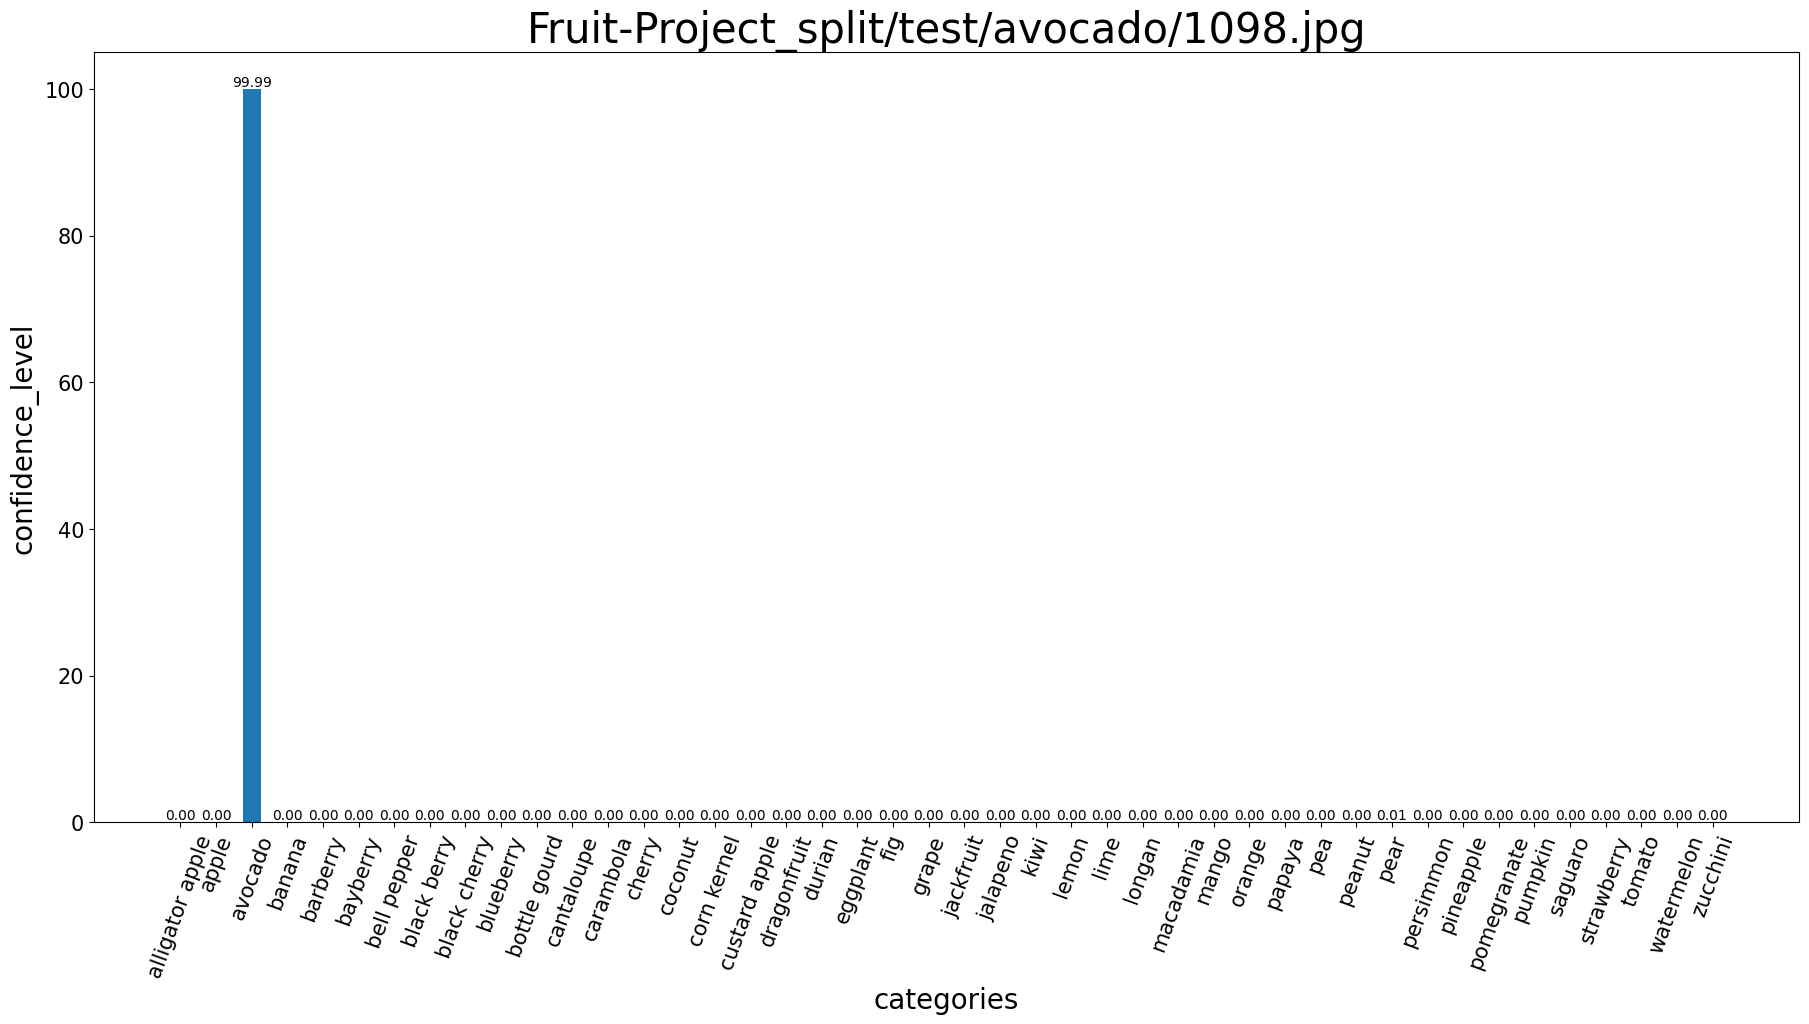

In [108]:
plt.figure(figsize=(22, 10))

x = idx_to_labels.values()
y = pred_softmax.cpu().detach().numpy()[0] * 100
width = 0.5 

ax = plt.bar(x, y, width)

plt.bar_label(ax, fmt='%.2f', fontsize=10) 
plt.tick_params(labelsize=15) 

plt.title(img_path, fontsize=30)
plt.xticks(rotation=70) 
plt.xlabel('categories', fontsize=20)
plt.ylabel('confidence_level', fontsize=20)
plt.show()

In [109]:
n = 10
top_n = torch.topk(pred_softmax, n)
pred_ids = top_n[1].cpu().detach().numpy().squeeze() 
confs = top_n[0].cpu().detach().numpy().squeeze()

In [110]:
from PIL import Image, ImageFont, ImageDraw

font = ImageFont.truetype('arial.ttf', 18)

In [111]:
pred_ids

array([ 2, 34, 28, 26,  0, 22, 25, 20, 31, 24])

In [112]:
confs

array([9.9989712e-01, 9.7880547e-05, 1.0798119e-06, 9.5023552e-07,
       5.5279992e-07, 4.8761393e-07, 4.3786363e-07, 2.6301663e-07,
       1.7505589e-07, 1.5895360e-07], dtype=float32)

In [113]:
from PIL import Image, ImageFont, ImageDraw
draw = ImageDraw.Draw(img_pil)

In [114]:
for i in range(n):
    class_name = idx_to_labels[pred_ids[i]] 
    confidence = confs[i] * 100 
    text = '{:<15} {:>.4f}'.format(class_name, confidence) 
    print(text)
    
    draw.text((5, 5 + 15 * i), text, font= font,fill=(255, 0, 0, 1))

avocado         99.9897
pear            0.0098
macadamia       0.0001
lime            0.0001
alligator apple 0.0001
jackfruit       0.0000
lemon           0.0000
fig             0.0000
papaya          0.0000
kiwi            0.0000


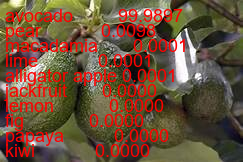

In [115]:
img_pil

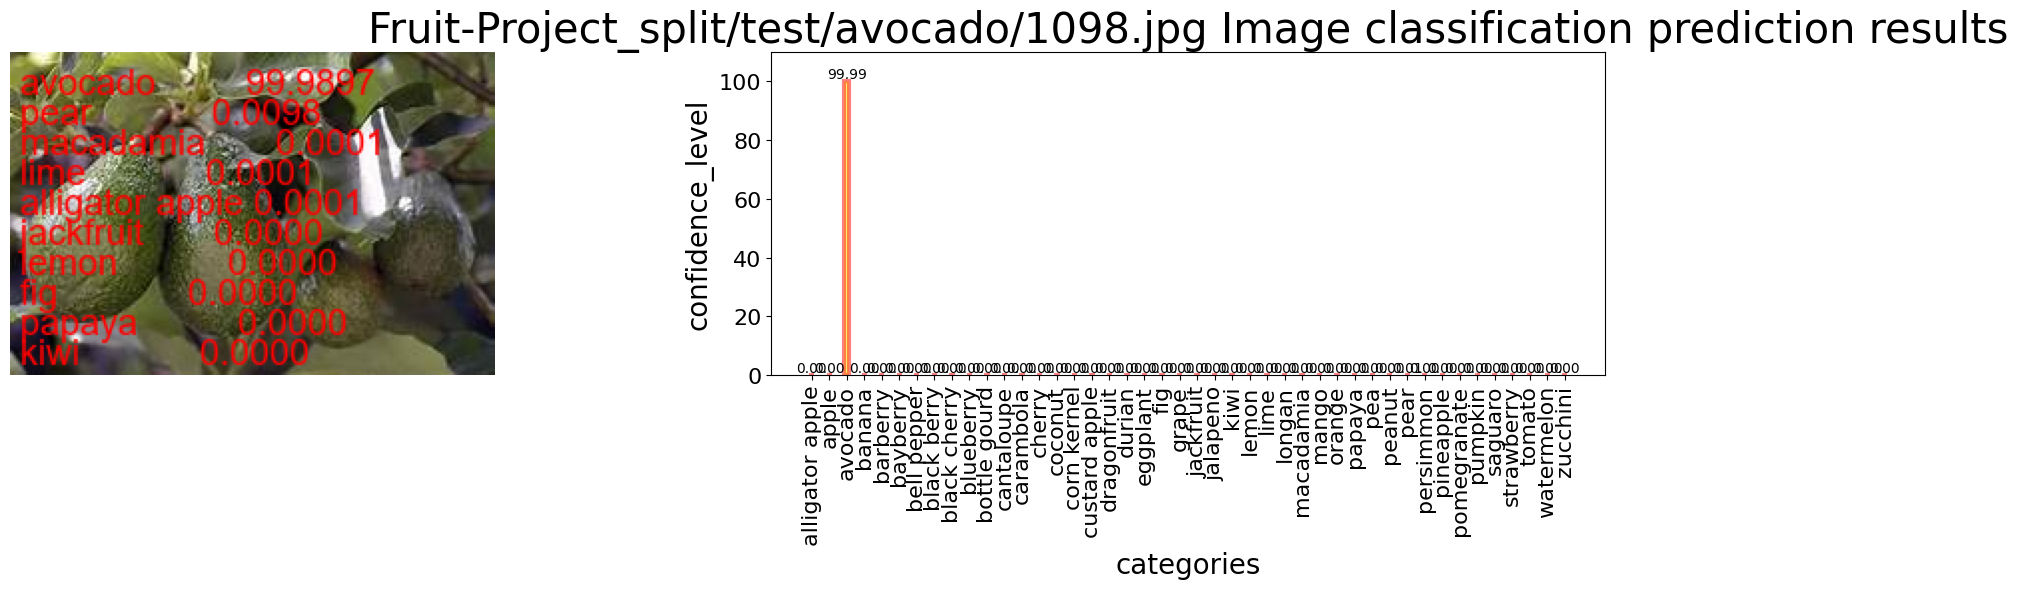

In [116]:
fig = plt.figure(figsize=(18,6))

ax1 = plt.subplot(1,2,1)
ax1.imshow(img_pil)
ax1.axis('off')

ax2 = plt.subplot(1,2,2)
x = idx_to_labels.values()
y = pred_softmax.cpu().detach().numpy()[0] * 100
ax2.bar(x, y, alpha=0.5, width=0.3, color='yellow', edgecolor='red', lw=3)
plt.bar_label(ax, fmt='%.2f', fontsize=10) 

plt.title('{} Image classification prediction results'.format(img_path), fontsize=30)
plt.xlabel('categories', fontsize=20)
plt.ylabel('confidence_level', fontsize=20)
plt.ylim([0, 110]) 
ax2.tick_params(labelsize=16) 
plt.xticks(rotation=90) 

plt.tight_layout()
fig.savefig('output/Forecast+Bar.jpg')

In [117]:
pred_df = pd.DataFrame() 
for i in range(n):
    class_name = idx_to_labels[pred_ids[i]] 
    label_idx = int(pred_ids[i]) 
    confidence = confs[i] * 100 
    pred_df = pd.concat([pred_df, pd.DataFrame({'Class': [class_name], 'Class_ID': [label_idx], 'Confidence(%)': [confidence]})], ignore_index=True)

In [118]:
display(pred_df)

,Class,Class_ID,Confidence(%)
0,avocado,2,99.989712
1,pear,34,0.009788
2,macadamia,28,0.000108
3,lime,26,0.000095
4,alligator apple,0,0.000055
5,jackfruit,22,0.000049
6,lemon,25,0.000044
7,fig,20,0.000026
8,papaya,31,0.000018
9,kiwi,24,0.000016


In [32]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['axes.unicode_minus']=False 
import gc
import os
import time
import shutil
import tempfile
from tqdm import tqdm
import cv2
from PIL import Image

In [190]:
!wget https://zihao-openmmlab.obs.myhuaweicloud.com/20220716-mmclassification/test/0818/fruits_video.mp4 -P test_img 

--2024-01-31 12:20:55--  https://zihao-openmmlab.obs.myhuaweicloud.com/20220716-mmclassification/test/0818/fruits_video.mp4
Connecting to 172.16.0.13:5848... connected.
Proxy request sent, awaiting response... 200 OK
Length: 17320366 (17M) [video/mp4]
Saving to: ‘test_img/fruits_video.mp4’

fruits_video.mp4    100%[===================>]  16.52M  29.5MB/s    in 0.6s    

2024-01-31 12:20:57 (29.5 MB/s) - ‘test_img/fruits_video.mp4’ saved [17320366/17320366]



In [33]:
import mmcv
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print('device:', device)

device: cuda:0


/environment/miniconda3/lib/python3.10/site-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training process and add a data transformation module. In addition, it will rename the package names mmcv to mmcv-lite and mmcv-full to mmcv. See https://github.com/open-mmlab/mmcv/blob/master/docs/en/compatibility.md for more details.
  warnings.warn(


In [34]:
import matplotlib
matplotlib.use('Agg')

In [35]:
idx_to_labels = np.load('idx_to_labels.npy', allow_pickle=True).item()

In [36]:
model = torch.load('checkpoint/best-0.873.pth')
model = model.eval().to(device)

In [37]:
from torchvision import transforms

test_transform = transforms.Compose([transforms.Resize(256),
                                     transforms.CenterCrop(224),
                                     transforms.ToTensor(),
                                     transforms.Normalize(
                                         mean=[0.485, 0.456, 0.406], 
                                         std=[0.229, 0.224, 0.225])
                                    ])

In [38]:
def pred_single_frame(img, n=5):

    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
    img_pil = Image.fromarray(img_rgb) 
    input_img = test_transform(img_pil).unsqueeze(0).to(device) 
    pred_logits = model(input_img) 
    pred_softmax = F.softmax(pred_logits, dim=1) 
    
    top_n = torch.topk(pred_softmax, n) 
    pred_ids = top_n[1].cpu().detach().numpy().squeeze() 
    confs = top_n[0].cpu().detach().numpy().squeeze() 
    
    draw = ImageDraw.Draw(img_pil)

    for i in range(len(confs)):
        pred_class = idx_to_labels[pred_ids[i]]
        text = '{:<15} {:>.3f}'.format(pred_class, confs[i])

        draw.text((50, 100 + 50 * i), text, font=font, fill=(255, 0, 0, 1))
        
    img_bgr = cv2.cvtColor(np.array(img_pil), cv2.COLOR_RGB2BGR) 
        
    return img_bgr, pred_softmax

In [197]:
input_video = 'test_img/fruits_video.mp4'
output_path = 'output/output_pred.mp4'

# method 1

In [201]:
temp_out_dir = time.strftime('%Y%m%d%H%M%S')
os.mkdir(temp_out_dir)
print('tempt {} Used to store per-frame prediction results'.format(temp_out_dir))

tempt 20240131122442 Used to store per-frame prediction results


In [204]:
imgs = mmcv.VideoReader(input_video)

prog_bar = mmcv.ProgressBar(len(imgs))

for frame_id, img in enumerate(imgs):
    
    img, pred_softmax = pred_single_frame(img, n=5)

    cv2.imwrite(f'{temp_out_dir}/{frame_id:06d}.jpg', img)
    
    prog_bar.update()

mmcv.frames2video(temp_out_dir, output_path, fps=imgs.fps, fourcc='mp4v')

shutil.rmtree(temp_out_dir)
print('Delete the temporary folder', temp_out_dir)
print('Video has been generated', output_path)

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 211/211, 23.9 task/s, elapsed: 9s, ETA:     0s[                                                  ] 0/211, elapsed: 0s, ETA:
Delete the temporary folder 20240131122442
Video has been generated output/output_pred.mp4


# method2

In [39]:
input_video = 'test_img/fruits_video.mp4'
output_path = 'output/output_bar.mp4'

In [40]:
import matplotlib
matplotlib.use('Agg')

In [41]:
def pred_single_frame_bar(img):
    
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    fig = plt.figure(figsize=(18,6))
    ax1 = plt.subplot(1,2,1)
    ax1.imshow(img)
    ax1.axis('off')
    ax2 = plt.subplot(1,2,2)
    x = idx_to_labels.values()
    y = pred_softmax.cpu().detach().numpy()[0] * 100
    ax2.bar(x, y, alpha=0.5, width=0.3, color='yellow', edgecolor='red', lw=3)
    plt.xlabel('category', fontsize=20)
    plt.ylabel('confidence level', fontsize=20)
    ax2.tick_params(labelsize=16) 
    plt.ylim([0, 100]) 
    plt.xlabel('category',fontsize=25)
    plt.ylabel('confidence level',fontsize=25)
    plt.title('predict result', fontsize=30)
    plt.xticks(rotation=75)
    
    plt.tight_layout()
    fig.savefig(f'{temp_out_dir}/{frame_id:06d}.jpg')
    fig.clf()
    plt.close()
    gc.collect()

In [42]:
temp_out_dir = time.strftime('%Y%m%d%H%M%S')
os.mkdir(temp_out_dir)
print('temporary {} Used to store per-frame prediction results'.format(temp_out_dir))

temporary 20240131133655 Used to store per-frame prediction results


In [43]:
imgs = mmcv.VideoReader(input_video)

prog_bar = mmcv.ProgressBar(len(imgs))

for frame_id, img in enumerate(imgs):
    
    img, pred_softmax = pred_single_frame(img, n=5)
    img = pred_single_frame_bar(img)
    
    prog_bar.update() 

mmcv.frames2video(temp_out_dir, output_path, fps=imgs.fps, fourcc='mp4v')

shutil.rmtree(temp_out_dir) 
print('Delete Temporary Video', temp_out_dir)
print('success', output_path)

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 211/211, 63.1 task/s, elapsed: 3s, ETA:     0s[                                                  ] 0/211, elapsed: 0s, ETA:
Delete Temporary Video 20240131133655
success output/output_bar.mp4
